# Imports

In [1]:
import pandas as pd
from google.colab import files
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

# Get a CSV File Data

In [2]:
def get_csv():
  choice = input("""
  Please choose an option below to get a CSV file:\n
  ------------------------------------------------\n
  Press '1' to upload a file\n
  Press '2' to prove a URL\n
  Press '3' to use the default data\n
  ------------------------------------------------\n
  """)

  if choice == "1":
    uploaded_file = files.upload()
    file_name = list(uploaded_file.keys())[0]
    return pd.read_csv(StringIO(uploaded_file[file_name].decode("utf-8")))
  elif choice == "2":
    url = input("Enter the URL: ")
    response = requests.get(url)
    return pd.read_csv(StringIO(response.text))
  elif choice == "3":
    url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv"
    response = requests.get(url)
    return pd.read_csv(StringIO(response.text))
  else:
    print("Option invalid")
    return None

# Print some examples from the data

In [3]:
def show_data(data, headings):
  print("Headings: ", headings)
  print(data.head(2))

# Convert two columns to numpy arrays

In [4]:
def convert_to_arrays(c1, c2):
  a1 = c1.values
  a2 = c2.values

  return a1, a2

# Show data as a scatter plot

In [5]:
def make_scatter_plot(a1, a2, n1="X-Axis", n2="Y-Axis", title="Scatter Plot"):
  plt.scatter(a1, a2)
  plt.xlabel(n1)
  plt.ylabel(n2)
  plt.title(title)
  plt.show()

# Calculator Usage


  Please choose an option below to get a CSV file:

  ------------------------------------------------

  Press '1' to upload a file

  Press '2' to prove a URL

  Press '3' to use the default data

  ------------------------------------------------

  3
Headings:  ['airline', 'avail_seat_km_per_week', 'incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14']
      airline  avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
0  Aer Lingus               320906734                2                      0   
1   Aeroflot*              1197672318               76                     14   

   fatalities_85_99  incidents_00_14  fatal_accidents_00_14  fatalities_00_14  
0                 0                0                      0                 0  
1               128                6                      1                88  


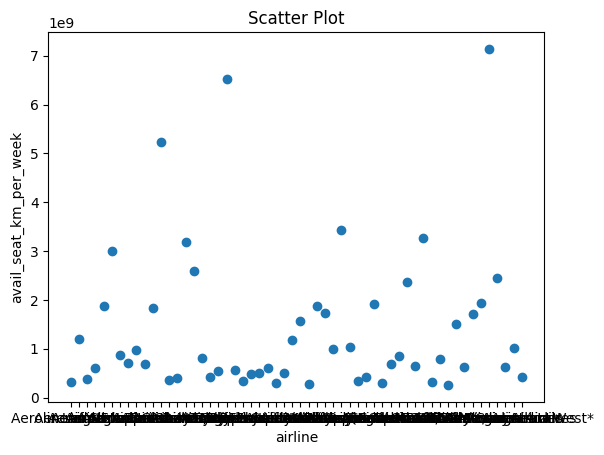

In [7]:
df = get_csv()
headings = df.columns.tolist()
show_data(df, headings)
a1, a2 = convert_to_arrays(df[headings[0]], df[headings[1]])
make_scatter_plot(a1, a2, headings[0], headings[1])